# **What is Perceptron | The Simplest Artificial neural network**

**Table of Content**


*   What is Perceptron?
*   Components of Perceptron



*   Binary Classification using Perceptron with PyTorch











**What is Perceptron?**

  Perceptron is a type of neural network that performs binary classification
that maps input features to an output decision, usually classifying data into
one of two categories, such as 0 or 1.


**Basic Components of Perceptron**

A Perceptron is composed of key components that work together to process information and make predictions.
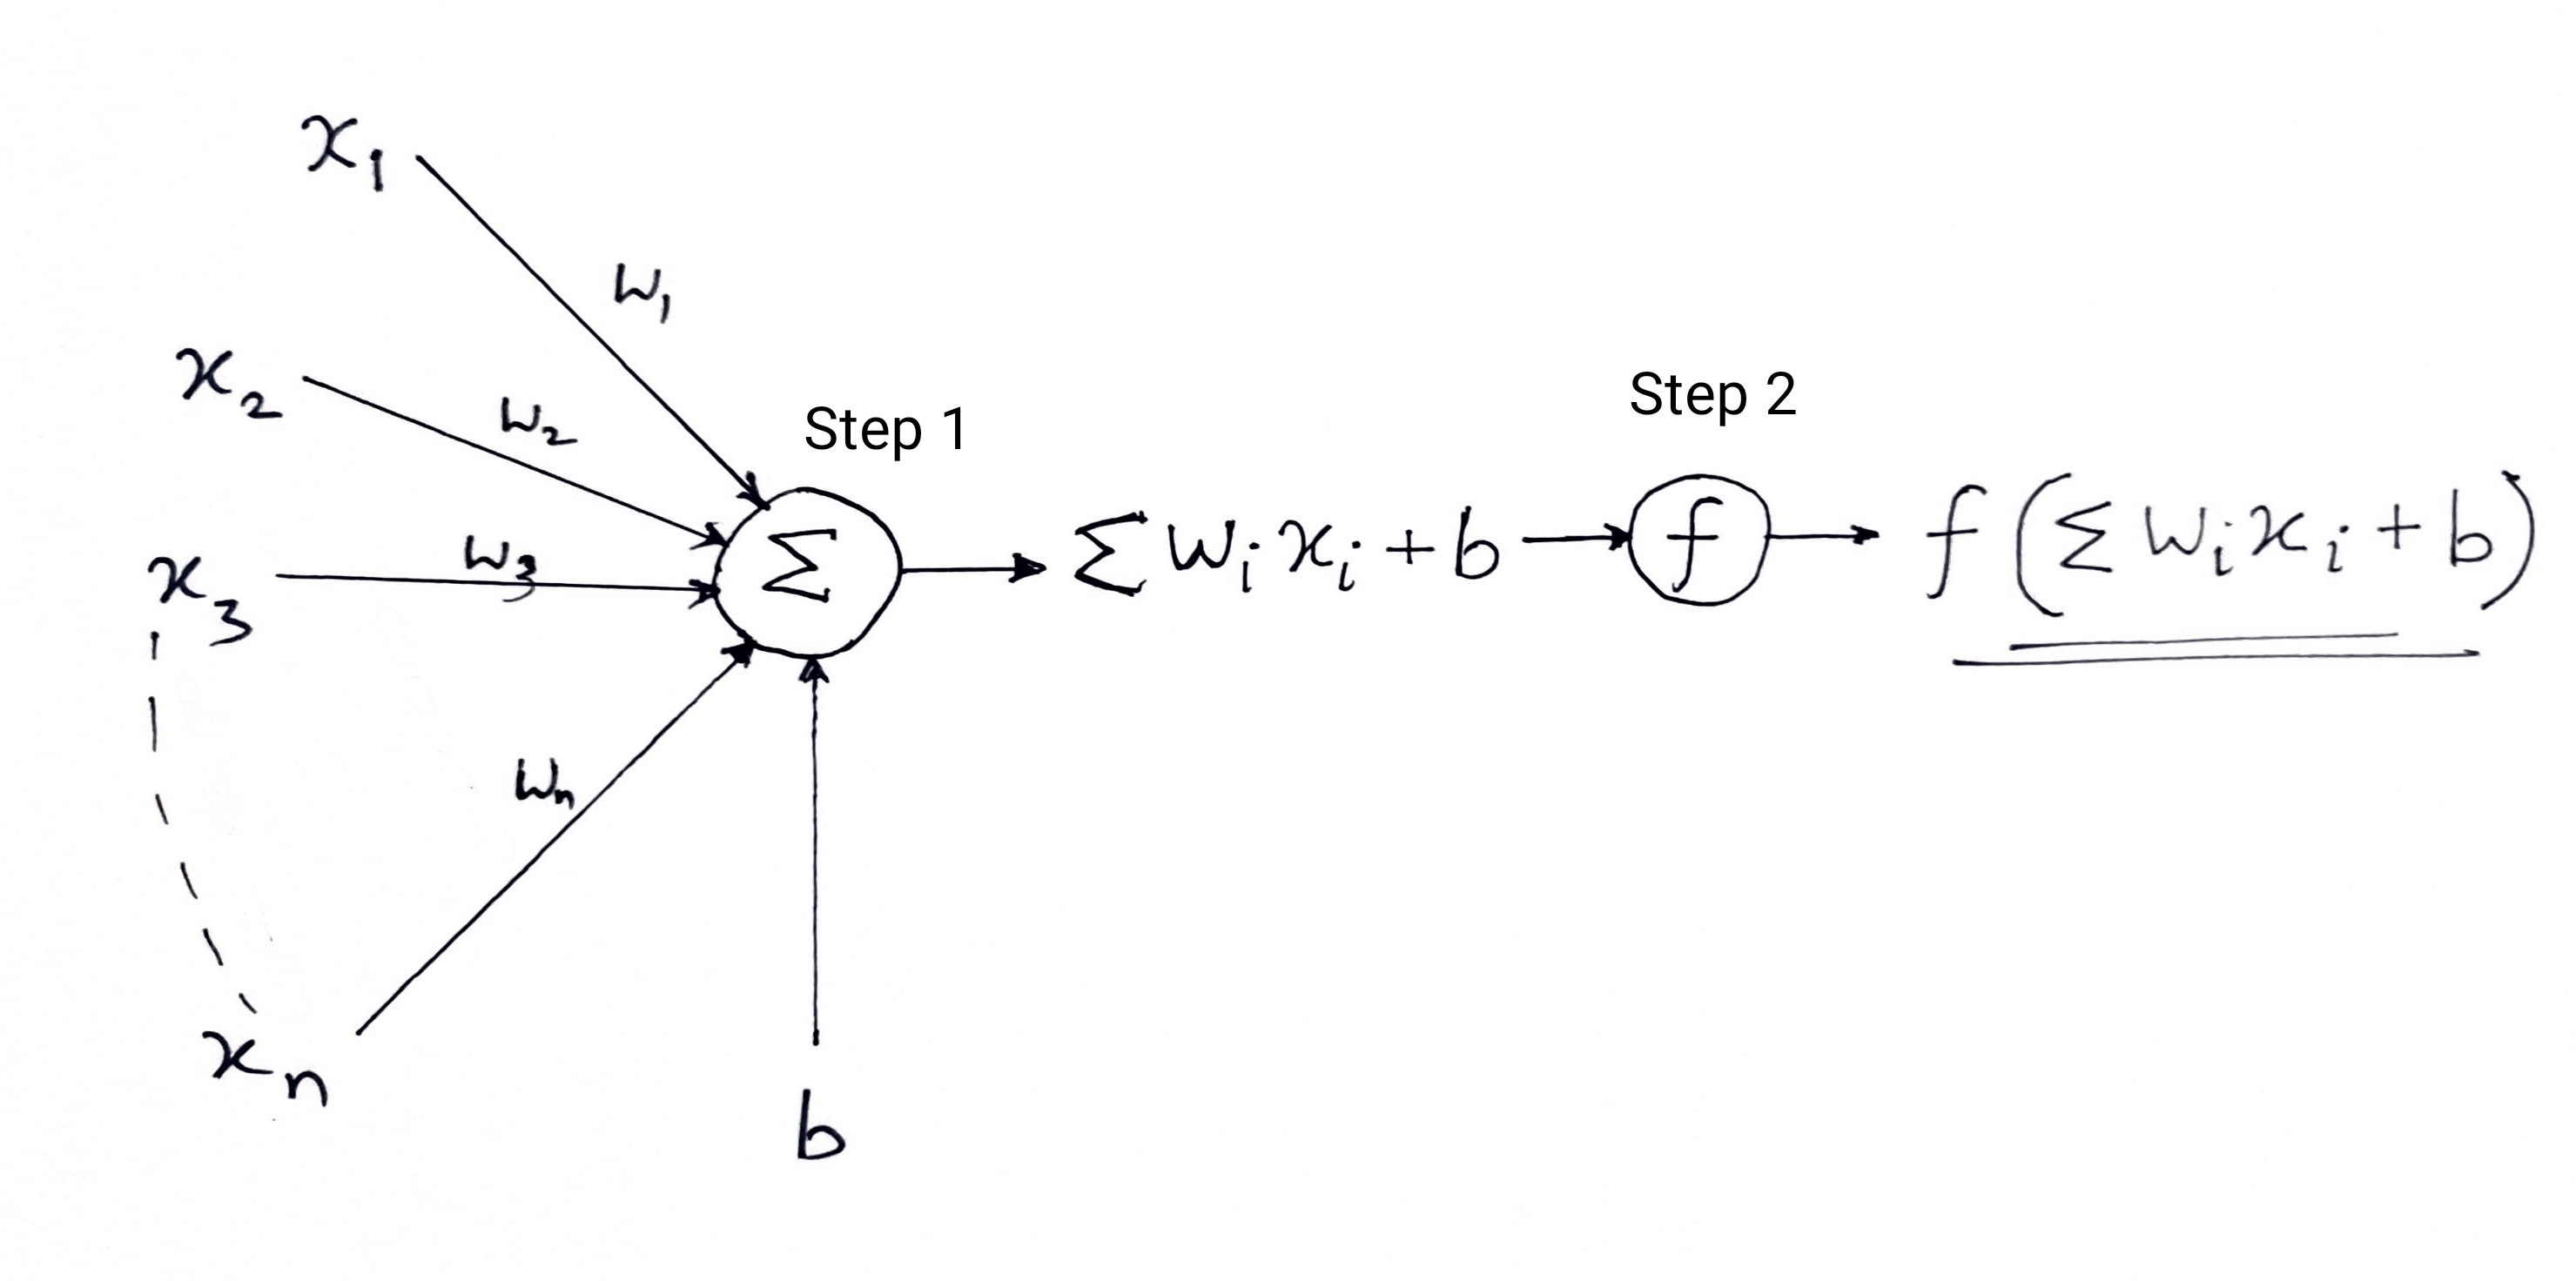


*   **Input Features**: The perceptron takes multiple input features, each representing a characteristic of the input data.
*  **Weights**: Each input feature is assigned a weight that determines its influence on the output. These weights are adjusted during training to find the optimal values.


*   **Summation Function**: The perceptron calculates the weighted sum of its inputs, combining them with their respective weights.
*   **Activation Function**: The weighted sum is passed through the Heaviside step function, comparing it to a threshold to produce a binary output (0 or 1).


*  **Output**: The final output is determined by the activation function, often used for binary classification tasks.
*   **Bias**: The bias term helps the perceptron make adjustments independent of the input, improving its flexibility in learning.


*  **Learning Algorithm**: The perceptron adjusts its weights and bias using a learning algorithm, such as the Perceptron Learning Rule, to minimize prediction errors.


These components enable the perceptron to learn from data and make predictions. While a single perceptron can handle simple binary classification, complex tasks require multiple perceptrons organized into layers, forming a neural network.







**Binary Classification using Perceptron with PyTorch**

In this section, we are going to implement perceptron model using PyTorch to perform binary classification on linearly separable data that is generated using make_blobs().


*  **Data Preparation**: A synthetic dataset with two features is created, scaled, and split into training and test sets.
*   **Perceptron Model**: A single-layer perceptron is implemented using PyTorch’s nn.Module.


*   **Training**: The Perceptron is trained using a simple learning rate and weight update rule for 10 epochs.
*   **Evaluation**: The model’s performance is evaluated by calculating the accuracy on the test set.


*   **Visualization**: The test dataset is visualized, with the predictions color-coded for easy interpretation.










Epoch [1/10], weight:[[-0.02891317 -0.2742279 ]], bias:[0.05627143] Loss: 37.0000
Epoch [2/10], weight:[[-0.01470152 -0.2751819 ]], bias:[0.04327145] Loss: 13.0000
Epoch [3/10], weight:[[-0.00764152 -0.27504045]], bias:[0.03527147] Loss: 8.0000
Epoch [4/10], weight:[[-0.00272658 -0.27456146]], bias:[0.02927147] Loss: 6.0000
Epoch [5/10], weight:[[ 0.00178578 -0.27384365]], bias:[0.02527147] Loss: 4.0000
Epoch [6/10], weight:[[ 0.00533448 -0.27302337]], bias:[0.02227147] Loss: 3.0000
Epoch [7/10], weight:[[ 0.00888318 -0.2722031 ]], bias:[0.01927147] Loss: 3.0000
Epoch [8/10], weight:[[ 0.01191312 -0.2713303 ]], bias:[0.01727147] Loss: 2.0000
Epoch [9/10], weight:[[ 0.01494306 -0.2704575 ]], bias:[0.01527147] Loss: 2.0000
Epoch [10/10], weight:[[ 0.01797299 -0.26958472]], bias:[0.01327147] Loss: 2.0000
Accuracy on Test Dataset: 0.9850000143051147


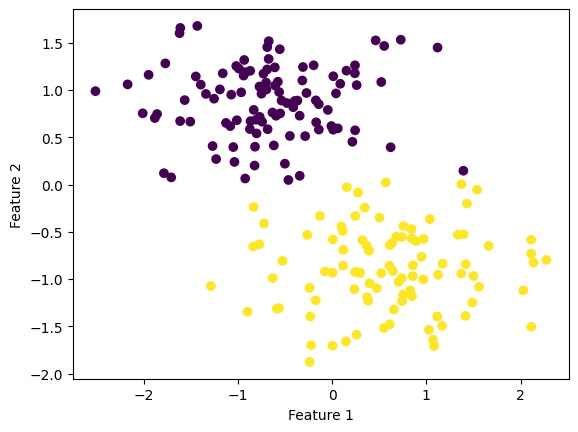

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >=0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)


# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost


# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight &amp; bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Limitations of Perceptron**

The Perceptron was a significant breakthrough in the development of neural networks, proving that simple networks could learn to classify patterns. However, the Perceptron model has certain limitations that can make it unsuitable for some tasks:


*   Limited to linearly separable problems
*   Struggles with convergence when handling non-separable data


*   Requires labeled data for training
*   Sensitive to input scaling


*   Lacks hidden layers for complex decision-making

To overcome these limitations, more advanced neural network architectures, such as Multilayer Perceptrons (MLPs) and Convolutional Neural Networks (CNNs), have been developed. These models can learn more complex patterns and are widely used in modern machine learning and deep learning applications.





